In [43]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import imports.stochastic_plots as stoch
import imports.examen_ordinaria_PE_2021_2022 as pe
import imports.BM_simulators as sim
import imports.sde_solvers as sde

# Set figure default size
_ = plt.rcParams['figure.figsize'] = (10, 6)

# Set number of decimals to print with numpy
np.set_printoptions(formatter={'float': lambda x: "{:0.4f}".format(x)})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 1: Simulation of a Continuous-time Markov Chain

Consideremos una sede en red (website) compuesta por tres páginas cuyas etiquetas son P1, P2, P3, respectivamente. Para identificar usuarios con un comportamiento atípico supondremos que el patr´on de navegación sigue una cadena de Markov en tiempo continuo. Con el fin estimar los parámetros del modelo hemos recopilado datos de navegación para un grupo representativo de usuarios. Los datos han sido registrados el mismo día de la semana y a la misma hora, de forma que podamos asumir que los parámetros del modelo son constantes con el tiempo.

Los resultados de las mediciones son los siguientes:

- En promedio, los usuarios pasan 2 minutos en P1, 30 segundos en P2 y 1 minuto en P3.
- Las transiciones entre páginas del sitio en red tienen las siguientes probabilidades.

| Estado inicial / final | P1  | P2  | P3  |
|------------------------|-----|-----|-----|
| P1                     | *   | 0.2 | 0.8 |
| P2                     | 0.3 | *   | 0.7 |
| P3                     | 0.6 | 0.4 | *   |


**a) Dibuja el diagrama de transiciones de la cadena de Markov. Etiqueta las transiciones con la probabilidad
correspondiente.**

![diagrama](figures/diagram_1.png)

**b) Escribe la matriz de transiciones para el proceso de saltos subyacente (jump process).**

La matriz será la siguiente:

$$
P = \begin{pmatrix}
    0 & 0.2 & 0.8 \\
    0.3 & 0 & 0.7 \\
    0.6 & 0.4 & 0 \\
\end{pmatrix}
$$

**c) Deriva la distribución estacionaria para el proceso de saltos.**

Sabemos que la distribución estacionaria del proceso de saltos $\tilde \pi$ es vector propio por la izquierda de la matriz de transición $P$ con valor propio 1:

$$
\tilde \pi^T P = \tilde \pi^T \longleftrightarrow
\begin{cases}
    \tilde \pi_1 = 0.3\tilde \pi_2 + 0.6\tilde \pi_3 \\
    \tilde \pi_2 = 0.2\tilde \pi_1 + 0.4\tilde \pi_3 \\
    \tilde \pi_3 = 0.8\tilde \pi_1 + 0.7\tilde \pi_2
\end{cases}
$$

Añadiendo la ecuación $\tilde \pi_1 + \tilde \pi_2 + \tilde \pi_3 = 1$ y [resolviendo el sistema de ecuaciones lineales con WolframAlpha](https://www.wolframalpha.com/input/?i=systems+of+equations+calculator&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation1%22%7D+-%3E%22-x+%2B+0.3y+%2B0.6z+%3D+0%22&assumption=%22FSelect%22+-%3E+%7B%7B%22SolveSystemOf4EquationsCalculator%22%7D%7D&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation2%22%7D+-%3E%220.2x+-+y+%2B+0.4z+%3D+0%22&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation3%22%7D+-%3E%220.8x+%2B+0.7y+-+z+%3D+0%22&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation4%22%7D+-%3E%22x+%2B+y+%2B+z+%3D+1%22) obtenemos:

$$
\tilde \pi^T = (\tilde \pi_1, \tilde \pi_2, \tilde \pi_3) = \left(\frac{36}{109}, \frac{26}{109}, \frac{47}{109}\right)
$$

**d) Deriva la distribución estacionaria para la cadena de Markov en tiempo continuo.**

Sabemos que el tiempo que un individuo pasa en una página web sigue una distribución exponencial de parámetro $\lambda$ con media $\frac{1}{\lambda}$. En nuestro caso, sabemos que las medias son $2$, $0.5$ y $1$ respectivamente, por lo que los lambdas asociados serán:

$$ (\lambda_1, \lambda_2, \lambda_3) = \left(\frac{1}{2}, 2, 1\right) $$

Además, sabemos que $\pi_j \propto \frac{\tilde \pi_j}{\lambda_j}$, y que $\pi_1 + \pi_2 + \pi_3 = 1$. Obtenemos:

$$
\left(\frac{\tilde \pi_1}{\lambda_1}, \frac{\tilde \pi_2}{\lambda_2}, \frac{\tilde \pi_3}{\lambda_3}\right) = \left(\frac{72}{109}, \frac{13}{109}, \frac{47}{109}\right) \propto \left(\frac{72}{132}, \frac{13}{132}, \frac{47}{132}\right) \rightarrow \\
\rightarrow \pi^T = \left(\frac{6}{11}, \frac{13}{132}, \frac{47}{132}\right)
$$

**e) Deriva el correspondiente generador infinitesimal.**

Sabemos que el generador infinitesimal para una cadena de Markov de tiempo contínuo cumple:

$$
g_{ij} = 
\begin{cases}
    \lambda_i \cdot p_{ij} \quad & \text{si } i \neq j \\
    - \lambda_i \quad & \text{si } i = j
\end{cases}
$$

En nuestro caso:

$$
G =
\begin{pmatrix}
    -\lambda_1 & 0.2 \cdot \lambda_1 & 0.8 \cdot \lambda_1 \\
    0.3 \cdot \lambda_2 & -\lambda_2 & 0.7 \cdot \lambda_2 \\
    0.6 \cdot \lambda_3 & 0.4 \cdot \lambda_3 & -\lambda_3 \\
\end{pmatrix} = 
\begin{pmatrix}
    -0.5 & 0.1 & 0.4 \\
    0.6 & -2 & 1.4 \\
    0.6 & 0.4 & -1 \\
\end{pmatrix}
$$

**f) A partir del generador infinitesimal deriva la distribución estacionaria del proceso y compárala con
el resultado anterior.**

Sabemos por una proposición vissta en clase que la distribución estacionaria de una cadena de Markov de tiempo contínuo con generador infinitesimal es el unico vector con norma 1 igual a 1 que cumple: $\pi^T G = 0$. Obtenemos el siguiente sistema de ecuaciones:

$$
\pi^T G = 0 \longleftrightarrow
\begin{cases}
    -0.5 \pi_1 + 0.6\pi_2 + 0.6\pi_3 = 0\\
    0.1\pi_1 -2\pi_2 + 0.4\pi_3 = 0 \\
    0.4\pi_1 + 1.4\pi_2 -\pi_3 = 0
\end{cases}
$$

De nuevo, añadimos la correspondiente ecuación $\pi_1 + \pi_2 + \pi_3 = 1$ y [resolvemos el correspondiente sistema de ecuaciones lineales con WolframAlpha](https://www.wolframalpha.com/input/?i=systems+of+equations+calculator&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation1%22%7D+-%3E%22-0.5x+%2B+0.6y+%2B0.6z+%3D+0%22&assumption=%22FSelect%22+-%3E+%7B%7B%22SolveSystemOf4EquationsCalculator%22%7D%7D&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation2%22%7D+-%3E%220.1x+-+2y+%2B+0.4z+%3D+0%22&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation3%22%7D+-%3E%220.4x+%2B+1.4y+-+z+%3D+0%22&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation4%22%7D+-%3E%22x+%2B+y+%2B+z+%3D+1%22) obteniendo:

$$
\pi^T = \left(\frac{6}{11}, \frac{13}{132}, \frac{47}{132}\right)
$$

como queríamos demostrar.

**g) Simula trayectorias del proceso suponiendo que en el instante t = 0 el sistema se encuentra en el
estado P(t = 0) = P1.**

Nuestra simulación considera los estados empezando por el cero. Renombrar los estados originales a $P_0, P_1, P_2$. 

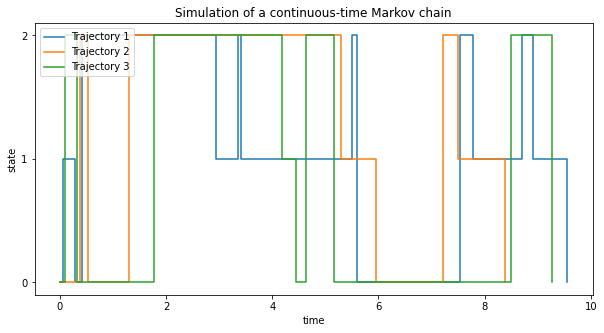

In [25]:
transition_matrix = [[  0,   0.2, 0.8], 
                     [  0.3,   0, 0.7],
                     [0.6, 0.44, 0]]
lambda_rates = [0.5, 2, 1]
t0 = 0.0
t1 = 10.0
state_0 = 0

# Simulate and plot a trajectory.
M = 3 # Number of simulations
N = 100 # Time steps per simulation

arrival_times_CTMC, trajectories_CTMC = (
    pe.simulate_continuous_time_Markov_Chain(
    transition_matrix, lambda_rates, 
    state_0, M, t0, t1))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10,5), num=1)
for m in range(M):
    ax.step(arrival_times_CTMC[m], 
            trajectories_CTMC[m],
            where='post')
ax.set_ylabel('state')
ax.set_yticks([0, 1, 2])
ax.set_xlabel('time')
ax.legend(['Trajectory {}'.format(i) for i in range(1, M+1)], loc='upper left')
_ = ax.set_title('Simulation of a continuous-time Markov chain')

**h) Utilizando la secuencia de estados de la cadena de Markov en el régimen estacionario:**
    
**i. Estima la distribución estacionaria del proceso de saltos subyacente a partir de una única trayectoria
de la cadena de Markov en tiempo continuo.**

**ii. Estima la distribución estacionaria de la cadena de Markov en tiempo continuo a partir de una
única trayectoria del proceso.**

**iii. Estima la distribución de la cadena de Markov en tiempo continuo en el límite $t \rightarrow \infty$ a partir
de los estados finales en M = 1000 trayectorias simuladas.**

**iv. Comenta los resultados de los apartados anteriores.**

In [85]:
# i. Stationary distribution of the jump process from a single trajectory
t_1 = 1000
n_initial_removed = 10
arrival_times_CTMC, trajectories_CTMC = \
    pe.simulate_continuous_time_Markov_Chain(
    transition_matrix, lambda_rates, 
    state_0, M=1, t0=0, t1=t_1)

N_states = len(lambda_rates)
traj = np.array(trajectories_CTMC[0])[n_initial_removed:]
times = arrival_times_CTMC[0][n_initial_removed:]

estimation = np.array([(traj == i).sum() for i in range(N_states)]) * 1.0 / len(traj)

print('Estimation of \\tilde \\pi:', estimation)
print('Real value of \\tilde \\pi: [{:0.4f} {:0.4f} {:0.4f}]'.format(36.0/109, 26/109, 47/109))

Estimation of \tilde \pi: [0.3304 0.2357 0.4339]
Real value of \tilde \pi: [0.3303 0.2385 0.4312]


In [88]:
# ii. Stationary distribution of the CTMC from a single trajectory
arrival_times_CTMC, trajectories_CTMC = \
    pe.simulate_continuous_time_Markov_Chain(
    transition_matrix, lambda_rates, 
    state_0=state_0, M=1, t0=0, t1=t_1)

N_states = len(lambda_rates)
traj = np.array(trajectories_CTMC[0])[n_initial_removed:]
times = arrival_times_CTMC[0][n_initial_removed:]

estimation = np.repeat(0.0, N_states)
for t1, t2, state in zip(times[:-1], times[1:], traj[:-1]):
    estimation[state] += t2 - t1

print(estimation)
    
estimation = np.array(estimation) * 1.0 / t_1

print('Estimation of \\pi:', estimation)
print('Real value of \\pi: [{:0.4f} {:0.4f} {:0.4f}]'.format(6/11, 13/132, 47/132))

[514.8818 103.7358 368.9784]
Estimation of \pi: [0.5149 0.1037 0.3690]
Real value of \pi: [0.5455 0.0985 0.3561]


In [63]:
# iii. Stationary distribution of the CTMC from the final state in a sample of M trajectories
t_1 = 10.0
M = 1000
state_0 = 0
arrival_times_CTMC, trajectories_CTMC = \
    pe.simulate_continuous_time_Markov_Chain(
    transition_matrix, lambda_rates, 
    state_0=state_0, M=M, t0=0.0, t1=t_1)

final_states = np.array([ single_traj[-1] for single_traj in trajectories_CTMC ])
estimation = np.array([(final_states == i).sum() for i in range(N_states)]) * 1.0 / M

print('Estimation of \\pi:', estimation)
print('Real value of \\pi: [{:0.4f} {:0.4f} {:0.4f}]'.format(6/11, 13/132, 47/132))

Estimation of \pi: [0.5340 0.1110 0.3550]
Real value of \pi: [0.5455 0.0985 0.3561]


Para estimar la distribución estacionaria para el proceso de saltos a partir de una única trayectoria podemos fijarnos en dónde está el proceso en cada instante temporal. Para ello quitamos los $n_{initial-removed}$ tiempos iniciales (para simular que el proceso comience en un estado aleatorio) y estimamos la probabilidad de estar en un estado por la proporción de veces que estuvo en dicho estado.

Para estimar la distribución estacionaria de la cadena de Markov en tiempo contínuo repetimos el proceso anterior teniendo en cuenta el tiempo que pasamos en cada estado. Repetimos un proceso análogo al anterior y estimamos la probabilidad de estar cada estado por la proporción de tiempo que pasó la trayectoria en dicho estado.

A pesar de quitar los primeros $n_{initial-removed}$, para tiempos bajos hay mucha variabilidad en los resultados. Si tomamos un valor de tiempo final bajo ($t_1 = 10$ o $t = 100$) los resultados varían mucho entre ejecuciones. Es por ello que tomamos un alto valor de tiempo final ($t_1 = 1000$) para la estimación realizada.

De cara a estimar la distribución estacionaria de la cadena de Markov en tiempo contínuo utilizando múltiples trayectorias, bastará con simular el número requerido de trayectorias y utilizar la última posición de cada trayectoria. Estimaremos la probabilidad de estar en cada estado por la proporción de trayectorias que terminaron en dicho estado.

Cabe destacar un detalle interesante del código: hemos creado un bucle `while` con condición `True` para luego utilizar un `break`. Aunque esta práctica esta desaconsejada en el caso general, en un bucle tan pequeño sigue siendo completamente legible. Además, hemos de tener cuidado con la condición de parada de nuestro algoritmo. Si simplemente cambiasemos la condición del `while` a `t > t1`, estaríamos incluyendo un paso adicional en la trayectoria. Es decir, **estaríamos computando las trayectorias hasta un paso después del instante $t=t_1$**. Cada trayectoria daría ese salto adicional en un tiempo distinto, y estaríamos comparando trayectorias en distintos estados temporales, no obteniendo así la distribución $\pi$ buscada.

Finalmente, vemos como las estimaciones de los resultados son bastante cercanos al resultado esperado en cada uno de los apartados.

**i) ¿Coinciden las distribuciones estacionarias para una cadena de Markov en tiempo discreto y para el proceso en tiempo continuo, ambas con el mismo diagrama de transición? En caso de que coincidan indica la razón. En caso de que no coincidan, define una cadena de Markov en tiempo continuo con el mismo diagrama de transiciones que tenga la misma distribución estacionaria que la correspondiente en tiempo discreto.**

Como comentamos en el apartado anterior, la distribución estacionaria de la cadena en tiempo contínuo $\pi$ se computa a partir de la estacionaria del proceso de saltos $\tilde \pi$ utilizando que:

$$\pi_j \propto \frac{\tilde \pi_j}{\lambda_j}$$

Además, la definición de un proceso de saltos subyacente únicamente tiene en cuenta la matriz de transición. Es decir, $\tilde \pi$ coincide con la distribución estacionaria de la cadena de Markov en tiempo discreto. Por lo tanto, la distribuciones estacionarias $\pi$ y $\tilde \pi$ coinciden si y sólo si $\lambda_i = \lambda_j$ para todo $i,j$, suponiendo que ambas tenga la misma matriz de transición.

En nuestro caso particular las matrices de transición son la misma pero los lambdas son distintos entres si, por lo que las distribuciones estacionarias no coinciden.

Como ejemplo de proceso en el que si coinciden bastaría tomar la misma matriz de transición y los lambdas todos iguales.

**j) En el modelo hemos supuesto que no hay usuarios que accedan desde paginas externas o abandonen el sito en red: todas las transiciones son entre páginas dentro del sitio. ¿Cómo podríamos modificar el modelo de forma que se tengan en cuenta los usuarios que acceden y los que abandonan el sitio en red durante el tiempo de observación? ¿En qué condiciones el modelo modificado alcanzaría un estado estacionario?**

**Idea 1:**

Para modelar la salida de usuarios del sistema bastaría con añadir un nuevo estado absorbente a nuestra cadena de Markov. Este estado simboliza que los usuarios que llegan a él abandona el sistema. Añadiríamos una transición desde cada estado de nuestra página web al estado absorbente con su debida probabilidad, modelando como los usuarios pueden salir del sistema.

Para modelar la llegada de nuevos usuarios al sistema, sabemos que la llegada de nuevos usuarios al sistema queda modelada por un proceso de llegada. Suponiendo que dicho proceso de llegada sea homogéneo$^{(1)}$ (es decir, los tiempos de llegada no depende del tiempo total sino únicamente del tiempo de la última llegada), este sigue una distribución exponencial. Para añadir la llegada de nuevos usuarios añadiría un nuevo estado al sistema conectado a todos los demás excepto al estado de salida. probabilidad de pasar del estado de entrada a cada uno de los estados será la probabilidad de que un usuario llegue a nuestro sitio web entrado en dicha página específica. Por ejemplo, la llegada a la página principal o índice tiene una probabilidad mayor de entrada.

El estado de entrada es particular. Es un estado al que no podemos llegar desde ningún otro. Su proceso de llegada nos indica que se genera un nuevo usuario dentro del sistema, no que un usuario presente en el mismo cambia de estado.

Podríamos unir ambos modelos combinando el estado de entrada y salida en un único estado. Sin embargo, esto asumiría que hay un número constante de usuarios en el sistema, lo que no tiene por qué ser cierto.

Para esta modelización, ¿a qué nos referimos con estado estacionario? Según hemos modelado nuestro sistema, los usuarios que llegan al estado de salida *mueren*. Esto es sencillo de simular utilizando un ordenador, al igual que la generación de los mismos. Sin embargo, a nivel teórico la definición de estado estacionario utilizada hasta ahora (el vector propio con valor propio 1 por la izquierda de la matriz de transición) no tiene por que ser único, ya que la matriz de transición tiene una fila de ceros (la del estado absorbente de salida).

Podríamos redefinir lo que significa alcanzar un estado estacionario $\bar \pi$. Sea $\eta$ el ratio de entrada/salida a nuestro sistema. esto es:

$$
\eta = \frac{\text{#usuarios entrantes}}{\text{#usuarios salientes}}
$$

- Si $\eta > 1$, entran más usuarios de los que salen toda la población mundial acabaría entrando en nuestra página web y quedándose en ella. La nueva distribución estacionaría $\bar \pi$ coincidiría con la distribución $\pi$ de la cadena de Markov de tiempo contínuo sin los estados de entrada y salida.

- Si $\eta = 1$, entran y salen el mismo número de usuarios en promedio. La distribución estacionaria se alcanzaría, pero no tendría por qué coincidir con la de la cadena de Markov de tiempo contínuo si las probabilidades de entrada a cada uno de los estados son distintas. Para calcular esta distribución podemos tener en cuenta que el número de usuarios de nuestro sistema es constante y referirnos a la segunda idea.

- Si $\eta < 1$, salen más usuarios de los que entran a la página web y tenderíamos a no tener usuarios en la misma. La distribución estacionaria (probabilidad de estar en cada estado en tiempo infinito) tendería a ser cero en todos los estados de la página web.

**Idea 2:**

La segunda idea consiste en asumir la hipótesis que antes dimos como falsa: el número de usuarios en el sistema es constante. Modelizamos así un único estado fuera del sistema uniendo los estados de entrada y salida, y cada trayectoria es un usuario de internet, no de nuestra página web. Obtenemos un nueva nueva matriz de transición, cuya distribución estacionaria se puede calcular como hasta ahora.

El principal problema de este modelo es la simulación del mismo. Para una simulación fehaciente hemos de asumir una cantidad de usuarios fuera del sistema mucho mayor que dentro del sistema, y se vuelve realmente ineficiente. Es por ello que la idea 1 puede dar mejores resultados en simulaciones dependiendo de las probabilidades de entrada y salida del sistema.

**Alcanzar un estado estacionario**

Sabemos que el sistema alcanza un estado estacionario cuando existe un tiempo $T$ tal que para todo tiempo $t > T$ el sistema está en un estado fijo con probabilidad 1. Esto es, la distribución estacionaria tiene $0$ en todas sus posiciones y un $1$ en una.

Sabemos que la distribución estacionaria depende de $\eta$. En particular:

- Si $\eta < 1$ se alcanzará un estado estacionario: todos los usuarios estarán fuera del sistema.

- Si $\eta > 1$ se alcanzará un estado estacionario si y sólo si la distribución estacionaria de la cadena de Markov de tiempo contínuo reducida (sin estados de entrada y salida) tiene un estado estacionario, y será dihco estado.

- Si $\eta = 1$, para que se alcance un estado estacionario necesitamos que la cadena reducida tenga un estado estacionario. Sin embargo, aunque en el interior de la web todos los usuarios tenderán a estar en un único estado, se mantedrán la proporción con las condiciones iniciales.

Por ejemplo, si inicialmente hay una proporción de $p_i$ usuarios en el estado $i$, el último estado $M$ es el estado que representa estar fuera del sistema, y el estado estacionario de la cadena de Markov reducida es el $0$, la distribución estarcionaria será:

$$
    \bar \pi = \left( \sum_{i=1}^{M-1}p_i, 0, \ldots, 0, p_M\right)
$$

Se alcanzará un estado estacionario en este caso si y sólo si $p_M = 0$ o $p_M = 1$.

**Caso particular**

Cuando generalizamos un modelo es buena práctica asegurarse de que el modelo reducido es caso particular del modelo completo. En este caso, el modelo reducido asume que el número de usuarios que entran y salen de la página es $0$, y que todos los usuarios inicialmente están dentro del sistema ($p_M = 0$ en nuestro último ejemplo).

El modelo encaja a la perfección y se alcanzará un estado estacionario si y sólo si la cadena reducida alcanza un estado estacionario, como cabría esperar.

Como nota final, cabe destacar que este proceso podría modelarse utilizando una cadena de Markov de muerte-nacimiento.

(1): En la realidad, la probabilidad de entrada de un usuario a nuestro sitio web dependerá de la tiempo actual. Es decir, la probabilidad de que un usuario entre a nuestra página a las 12 del medio día será distinta que la de entrar a las 12 de la noche, y será distinta que entrar a las 12 de la noche el dia 31 de diciembre. Este modelo es una simplificación de la realidad por este motivo entre muchos otros.

# Exercise 2: Modelo de Vasicek

En el modelo de Vasicek se realiza la suposición de que la curva que describe la evolución del tipo de interés a corto plazo con el tiempo ($r(t)$) es una realización de un proceso de Ornstein-Uhlenbeck. La ecuación diferencial estocástica para este proceso es

\begin{equation}
    dr(t) = −\alpha (r(t) − r_\infty) dt + \sigma dW(t), \quad r(s) \perp dW(t), ∀s ≤ t
\end{equation}

donde $\alpha > 0$ es la tasa de reversión a la media, $r_\infty$ el tipo de interés a largo plazo y $\sigma > 0$ la volatilidad instantánea.

Este proceso tiene las siguientes propiedades:
- Es estacionario.
- Presenta reversión a la media.

La solución de esta ecuación diferencial estocástica para $t \ge t_0$ a partir de la condición inicial $r(t_0) = r_0$ es 

\begin{equation}
    r(t) = r_\infty + (r_0 − r_\infty) e^{-\alpha(t - t_0)}
        + \sigma \sqrt{\frac{1 - e^{-2\alpha(t-t_0)}}{2\alpha}}
        Z, \quad Z \sim N(0, 1)
\end{equation}

**a) A partir de Eq. (2) deriva las expresiones para $\mathbb E[r(t)|r(t_0) = r_0]$ y $\text{Cov}[r(t), r(t')|r(t_0) = r_0]$.**

En primer lugar, identificamos la Eq. 1 con la ecuación diferencial asociada a un proceso de Ornstein-Uhlenbeck:

$$
    dX(t) = -k X(t)dt + \sqrt D dW(t)
$$

donde identificamos $X(t) = (r(t) - r_\infty)$, $dX(t) = dr(t)$, $k=\alpha$ y $\sigma^2 = D$.

Para calcular la esperanza, tomamos esperanza respecto a la variable $Z$ en la Eq. (2) pues el resto de valores son constantes. Utilizando el linealidad del operador esperanza y $\mathbb E[Z] = 0$ obtenemos:

$$
\mathbb E[r(t)|r(t_0) = r_0] = r_\infty + (r_0 − r_\infty) e^{-\alpha(t - t_0)}
$$

Por otro lado, la forma más sencilla de calcular la covarianza es utilizar la covarianza de un proceso de Ornstein-Uhlenbeck. Sin embargo, en la fórmula desarrollada en las transparencias se asume $t_0 = 0$, lo que no ocurre en nuestro caso. 


Consider the Ito SDE
$$
d \sigma(t) = - \alpha \left( \sigma(t) -  \sigma_{\infty} \right) dt + \xi dW(t),   
$$
where $\alpha > 0$ is the reversion rate, $\xi > 0$ is the volatility of the stochastic process $\sigma(t)$. 

Define the process $X(t) = \sigma(t) - \sigma_{\infty}$. Since $ \sigma_{\infty} $ is constant, $dX(t) = d \sigma(t)$, and the equation becomes
$$
d X(t) = - \alpha X(t) dt + \xi dW(t).
$$


Let's take the expected value on both sizes of the equation 
$$
\mathbb{E}\left[dX(t) \right] = \mathbb{E}\left[ - \alpha  X(t) dt + \xi  dW(t) \right].
$$

Using the fact that the expected value is a linear operator, we get
$$
d\mathbb{E} \left[X(t) \right] = - \alpha \mathbb{E}\left[ X(t) \right] dt + \xi \mathbb{E}\left[ dW(t) \right].
$$
Since the Wiener process has zero mean, the equation becomes 
$$
d \mathbb{E} \left[ X(t) \right] = - \alpha  \mathbb{E} \left[ X(t) \right] dt.
$$
Using the method of separation of variables
$$
\frac{1}{ \mathbb{E} \left[ X(t) \right]} d \mathbb{E} \left[ X(t) \right] = - \alpha dt,
$$
the equation can be integrated between $(t_0, X_0)$, where $X_0 = \sigma_0 - \sigma_{\infty}$, and $\left(t,  \mathbb{E} \left[ X(t) \right] \right)$
$$
\int_{X_0}^{\mathbb{E} \left[ X(t) \right]} \frac{1}{ \mathbb{E} \left[ X \right]} d \mathbb{E} \left[ X \right]  = - \alpha \int_{t_0}^t d\tau. 
$$
The solution is
$$
\log \frac{ \mathbb{E}\left[X(t) \right] }{ X_0 } = - \alpha \left(t- t_0 \right).
$$
After some straightforward algebraic manipulation, one obtains
$$
\mathbb{E} \left[ X(t) \right] =  X_0  e^{- \alpha \left(t- t_0 \right)}.
$$
Undoing the change of variable, we obtain
$$
\mathbb{E} \left[ \sigma(t) \right] = \sigma_{\infty} + \left(\sigma_0  - \sigma_{\infty} \right)  e^{- \alpha \left(t- t_0 \right)}.
$$

### Derivation of $\text{Var}\left[\sigma(t)\right]$

### Derivation of the conditional pdf:  $\text{pdf}\left[\left.  t, \sigma(t) \right| t_0, \sigma_0 \right]$

### Simulation of the SDE $
d \sigma(t) = - \alpha \left( \sigma(t) -  \sigma_{\infty} \right) dt + \xi dW(t),   
$


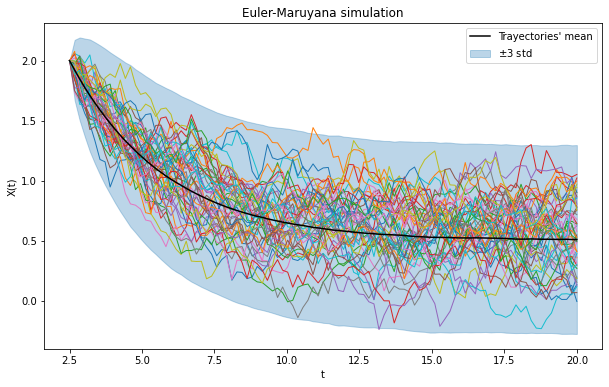

In [75]:
# Simulation of a sample of trajectories
M = 10000
N = 100
t0 = 2.5
T = 17.5
sigma_0 = 2.0
sigma_inf = 0.5
alpha = 0.3
xi = 0.2

def a(t,x): return -alpha*(x - sigma_inf)
def b(t,x): return xi

t, X = sde.euler_maruyana(t0, sigma_0, T, a, b, M, N)

stoch.plot_trajectories(t, X, max_trajectories=50, fig_num=1)
sde.subplot_mean_and_std(t, np.mean(X, axis=0),
                         3*np.std(X, axis=0),
                         color='black')
plt.legend(['Trayectories\' mean', '$\pm$3 std'])
_ = plt.title('Euler-Maruyana simulation')

In [9]:
# Mean and stdev of the trajectories simulated           
mean_sim = np.mean(X, axis=0)


In [10]:
# Asymptotic stationary pdf of the process

# Exercise 4: Pricing of a European call option

## Pricing by quadrature

In [11]:
# Parameters that characterize underlying 
S0 = 100.0
sigma = 0.3

# Parameters of the EU call option
K = 90.0
T = 2.0

# Risk-free interest rate
r = 0.05

price_EU_call = pe.price_EU_call(S0, K, r, sigma, T)

print('Price = {:.4f}'.format(price_EU_call))

Price = 26.2402


## Monte Carlo pricing of a European call option